In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
import folium
import json
from glob import glob
import missingno as msno

In [2]:
df = pd.read_csv('./datas/industry_merged.csv', encoding='utf-8')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104


In [3]:
df.columns.unique()

Index(['산업분류', '년도', '회사수 (개)', '매출액 (백만원)', '당기순이익 (백만원)', '영업이익 (백만원)',
       '경상이익 (백만원)', '매출액증가율 (%)', '매출액이익률 (%)', '납입자본이익률 (%)', '매출액경상이익률 (%)',
       '자기자본이익률 (%)', '총자본경상이익률 (%)', '시장규모', '시총'],
      dtype='object')

In [4]:
df['산업분류'].unique()

array(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학', '제조업'], dtype=object)

In [5]:
df[df['산업분류'] =='전기전자'].head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
210,전기전자,2005,318,139669118,16563572,18376493,19588701,12.836667,0.410000,25.041667,1.868333,-0.881667,1.866667,102760372,193683017
211,전기전자,2006,342,139108840,9770007,11060239,10723539,6.865000,-4.051667,-5.403333,-3.393333,-9.760000,-3.890000,106575734,170062155
212,전기전자,2007,350,142517552,9220646,9146482,10473102,8.668333,-2.563333,2.293333,-1.820000,-4.841667,-1.781667,108678144,178873248
213,전기전자,2008,361,152065131,7641123,8998390,9692186,6.720000,-7.830000,-44.146667,-6.988333,-16.221667,-6.778333,123843348,116721643
214,전기전자,2009,350,169398673,3270895,6556552,4293565,2.480000,0.388333,13.281667,1.090000,1.355000,1.275000,140067824,228509681


In [6]:
len(df[df['산업분류'] =='전기전자'])

14

In [7]:
df_elec = df[df['산업분류'] =='전기전자']

In [8]:
df_elec.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
210,전기전자,2005,318,139669118,16563572,18376493,19588701,12.836667,0.410000,25.041667,1.868333,-0.881667,1.866667,102760372,193683017
211,전기전자,2006,342,139108840,9770007,11060239,10723539,6.865000,-4.051667,-5.403333,-3.393333,-9.760000,-3.890000,106575734,170062155
212,전기전자,2007,350,142517552,9220646,9146482,10473102,8.668333,-2.563333,2.293333,-1.820000,-4.841667,-1.781667,108678144,178873248
213,전기전자,2008,361,152065131,7641123,8998390,9692186,6.720000,-7.830000,-44.146667,-6.988333,-16.221667,-6.778333,123843348,116721643
214,전기전자,2009,350,169398673,3270895,6556552,4293565,2.480000,0.388333,13.281667,1.090000,1.355000,1.275000,140067824,228509681


<AxesSubplot:xlabel='년도', ylabel='시장규모'>

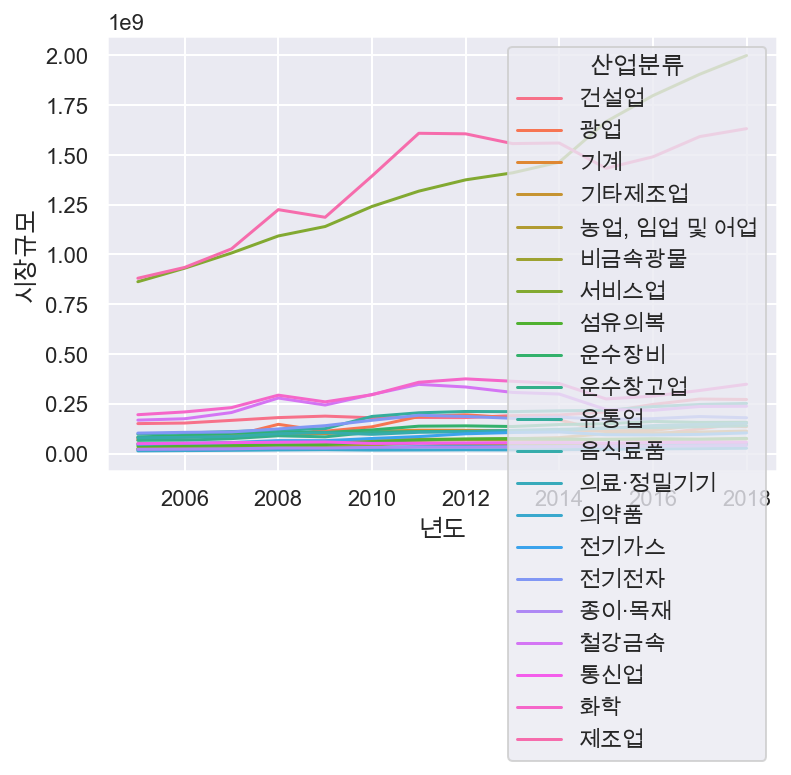

In [9]:
sns.lineplot(x="년도", y="시장규모",
             hue="산업분류", #style="event",
             data=df)

<AxesSubplot:xlabel='년도', ylabel='시장규모'>

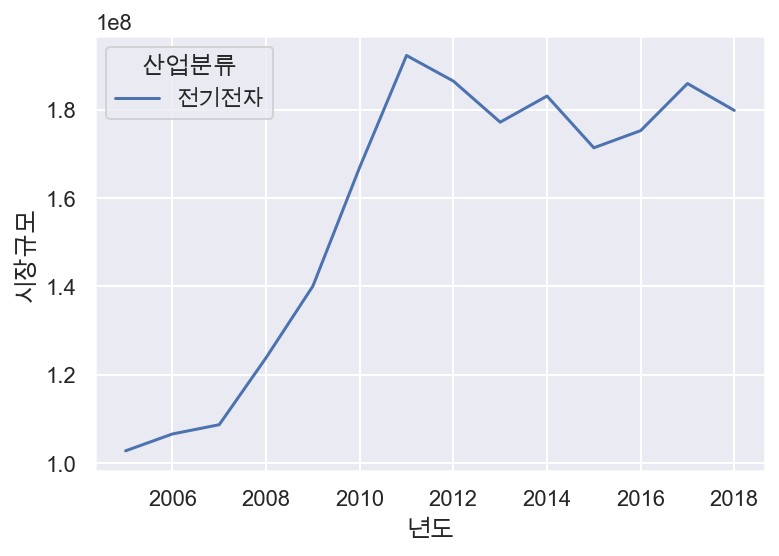

In [10]:
sns.lineplot(x="년도", y="시장규모",
             hue="산업분류", #style="event",
             data=df_elec)

sns.pairplot(df, hue="산업분류", height=5)

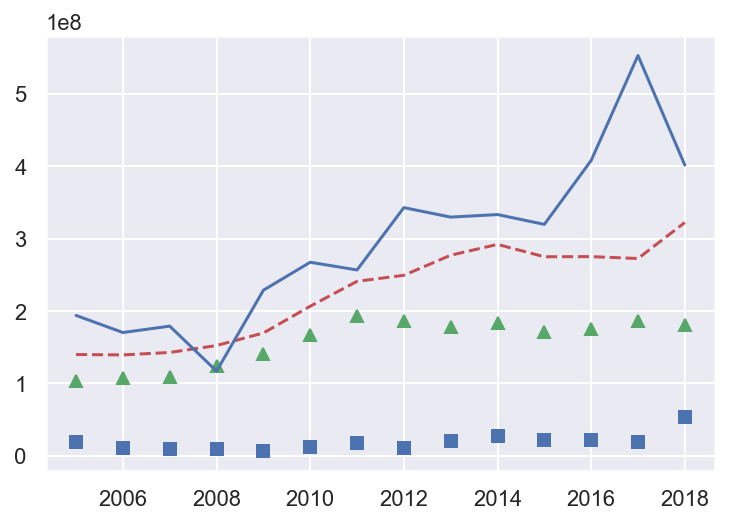

In [11]:
plt.plot(df_elec['년도'], df_elec['매출액 (백만원)'], 'r--', 
        df_elec['년도'], df_elec['영업이익 (백만원)'], 'bs', 
        df_elec['년도'], df_elec['시장규모'], 'g^',
        df_elec['년도'], df_elec['시총'], 'b' )

In [12]:
df_norm = pd.read_csv('./datas/norm_std.csv', encoding='utf-8')
df_norm.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363
1,건설업,2006,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515
2,건설업,2007,0.881405,-1.307870,1.277530,0.907893,1.216305,0.004754,1.158666,0.925987,1.119361,1.041482,0.959357,-0.782831,3.089481
3,건설업,2008,0.406802,-0.745983,1.485602,0.982775,1.591530,1.438305,0.903774,0.877722,0.992318,0.834101,0.698444,-0.429057,-0.789891
4,건설업,2009,-0.067800,0.078639,0.753429,0.781592,0.801649,1.725894,0.275041,0.412212,0.241224,0.320557,0.076267,-0.243099,0.348886


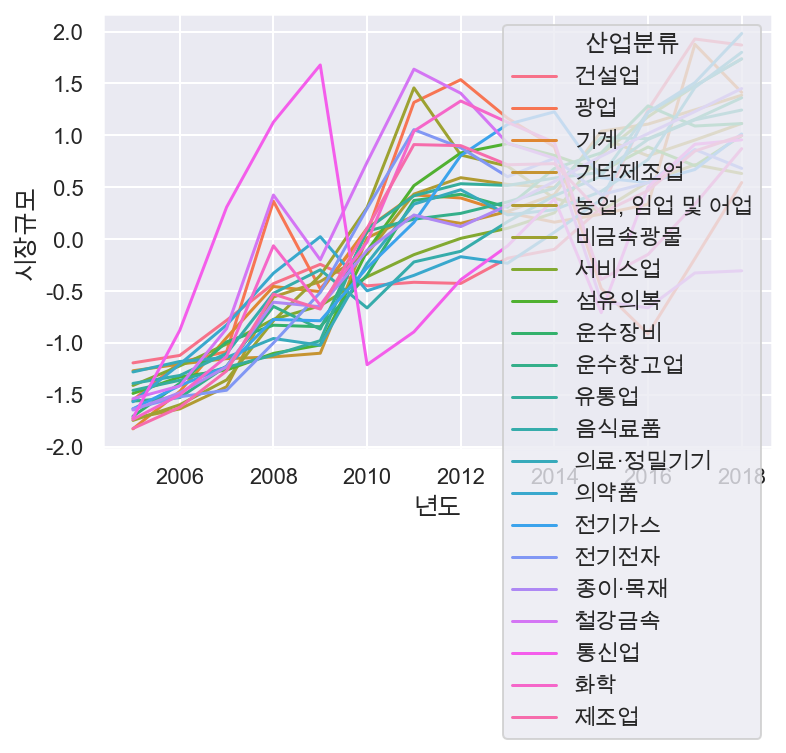

In [13]:
sns.lineplot(x="년도", y='시장규모',
             hue="산업분류", #style="event",
             data=df_norm);
# sns.lineplot(x="년도", y="시장규모",
#              hue="산업분류", #style="event",
#              data=df_norm);

In [14]:
df_norm_elec = df_norm[df_norm['산업분류']=='전기전자']
df_norm_elec.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
210,전기전자,2005,-2.240977,-1.315856,0.057853,-0.004144,0.006940,0.899327,-0.021112,-0.101100,0.168827,-0.131088,0.216379,-1.634357,-0.856726
211,전기전자,2006,-0.556484,-1.324481,-0.666603,-0.624993,-0.721433,0.004815,-1.416595,-1.118500,-1.461818,-1.582437,-1.619599,-1.519769,-1.060974
212,전기전자,2007,0.005013,-1.272006,-0.725186,-0.787392,-0.742009,0.274941,-0.951087,-0.861295,-0.974225,-0.778433,-0.947186,-1.456626,-0.984785
213,전기전자,2008,0.777072,-1.125026,-0.893624,-0.799959,-0.806170,-0.016905,-2.598351,-2.413209,-2.575945,-2.638732,-2.540777,-1.001165,-1.522205
214,전기전자,2009,0.005013,-0.858187,-1.359658,-1.007170,-1.249727,-0.652026,-0.027889,-0.494091,-0.072386,0.234542,0.027679,-0.513890,-0.555583


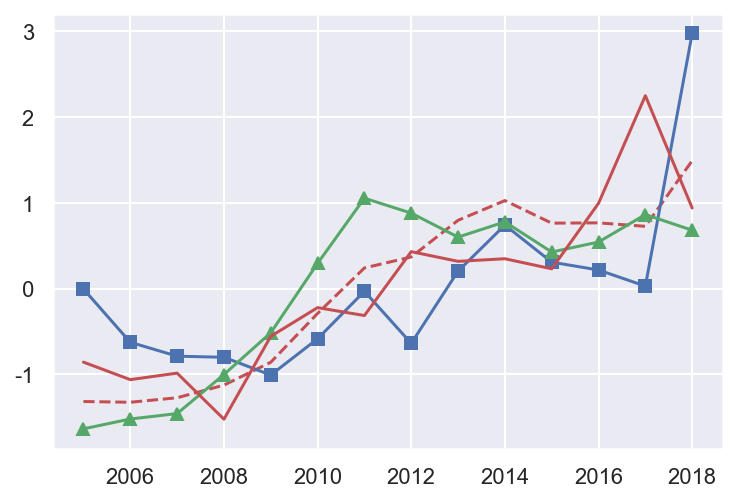

In [15]:
plt.plot(df_norm_elec['년도'], df_norm_elec['매출액 (백만원)'], 'r--', 
        df_norm_elec['년도'], df_norm_elec['영업이익 (백만원)'], 'bs-', 
        df_norm_elec['년도'], df_norm_elec['시장규모'], 'g^-',
        df_norm_elec['년도'], df_norm_elec['시총'], 'r' )

In [17]:
for i in range(len(df_norm['산업분류'].unique().tolist())):
    globals()['df_norm_ind_{}'.format(i)] = df_norm[df_norm['산업분류'] == '{}'.format(df_norm['산업분류'].unique().tolist()[i])]

df_norm_ind_20.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
280,제조업,2005,-1.458654,-1.516047,-0.270955,-0.414117,-0.215933,0.950658,0.233111,-0.403820,0.543368,1.081940,1.463996,-1.825190,-1.298605
281,제조업,2006,-0.695702,-1.386625,-0.798353,-1.115239,-0.893067,0.090995,-0.693948,-0.777591,-0.448483,-0.200840,-0.000707,-1.621024,-1.312625
282,제조업,2007,-0.582070,-1.447037,-1.161402,-1.470859,-1.197282,-0.750001,-1.513228,-1.227325,-1.281523,-1.062449,-0.808428,-1.270760,-0.667959
283,제조업,2008,-0.533371,-1.176175,-1.021275,-1.069068,-0.947613,1.605389,-2.196274,-2.164795,-2.265921,-2.713198,-2.377992,-0.530277,-1.613283
284,제조업,2009,-0.906731,-0.362867,-1.300724,-0.412802,-1.345503,0.603945,-0.150620,-0.466489,-0.195265,0.095048,-0.021097,-0.674512,-0.581739


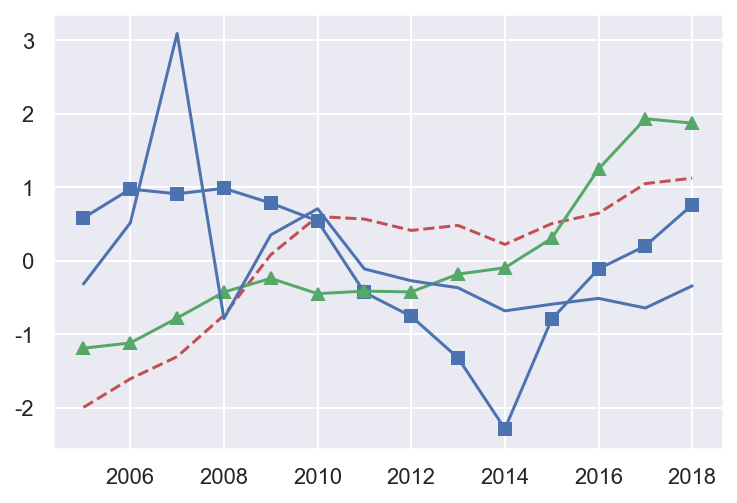

In [18]:
plt.plot(df_norm_ind_0['년도'], df_norm_ind_0['매출액 (백만원)'], 'r--', 
        df_norm_ind_0['년도'], df_norm_ind_0['영업이익 (백만원)'], 'bs-', 
        df_norm_ind_0['년도'], df_norm_ind_0['시장규모'], 'g^-',
        df_norm_ind_0['년도'], df_norm_ind_0['시총'], 'b' )

In [19]:
df_norm_ind_0_trans = df_norm_ind_0.set_index('년도').transpose()

df_norm_ind_0_trans.head()

년도,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
산업분류,건설업,건설업,건설업,건설업,건설업,건설업,건설업,건설업,건설업,건설업,건설업,건설업,건설업,건설업
회사수 (개),-0.542403,0.881405,0.881405,0.406802,-0.0678,-0.0678,0.881405,1.83061,0.881405,-0.542403,-0.542403,-1.491608,-1.017005,-1.491608
매출액 (백만원),-1.998367,-1.610409,-1.30787,-0.745983,0.078639,0.599326,0.564343,0.40987,0.478025,0.219182,0.50234,0.643824,1.046647,1.120433
당기순이익 (백만원),0.868508,1.252618,1.27753,1.485602,0.753429,-0.574793,-0.420133,-0.602034,-1.192261,-1.679929,-0.885618,-0.496724,-0.120021,0.333826
영업이익 (백만원),0.579365,0.972198,0.907893,0.982775,0.781592,0.539391,-0.43435,-0.758801,-1.325493,-2.290125,-0.797306,-0.1133,0.199224,0.756936


In [20]:
df_norm_ind_0_trans.drop(labels='산업분류').head()


년도,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
회사수 (개),-0.542403,0.881405,0.881405,0.406802,-0.0678,-0.0678,0.881405,1.83061,0.881405,-0.542403,-0.542403,-1.491608,-1.017005,-1.491608
매출액 (백만원),-1.998367,-1.610409,-1.30787,-0.745983,0.078639,0.599326,0.564343,0.40987,0.478025,0.219182,0.50234,0.643824,1.046647,1.120433
당기순이익 (백만원),0.868508,1.252618,1.27753,1.485602,0.753429,-0.574793,-0.420133,-0.602034,-1.192261,-1.679929,-0.885618,-0.496724,-0.120021,0.333826
영업이익 (백만원),0.579365,0.972198,0.907893,0.982775,0.781592,0.539391,-0.43435,-0.758801,-1.325493,-2.290125,-0.797306,-0.1133,0.199224,0.756936
경상이익 (백만원),0.852371,1.187412,1.216305,1.59153,0.801649,-0.539185,-0.568796,-0.589152,-1.118916,-1.757579,-0.756684,-0.474152,-0.14225,0.297447


<AxesSubplot:xlabel='년도'>

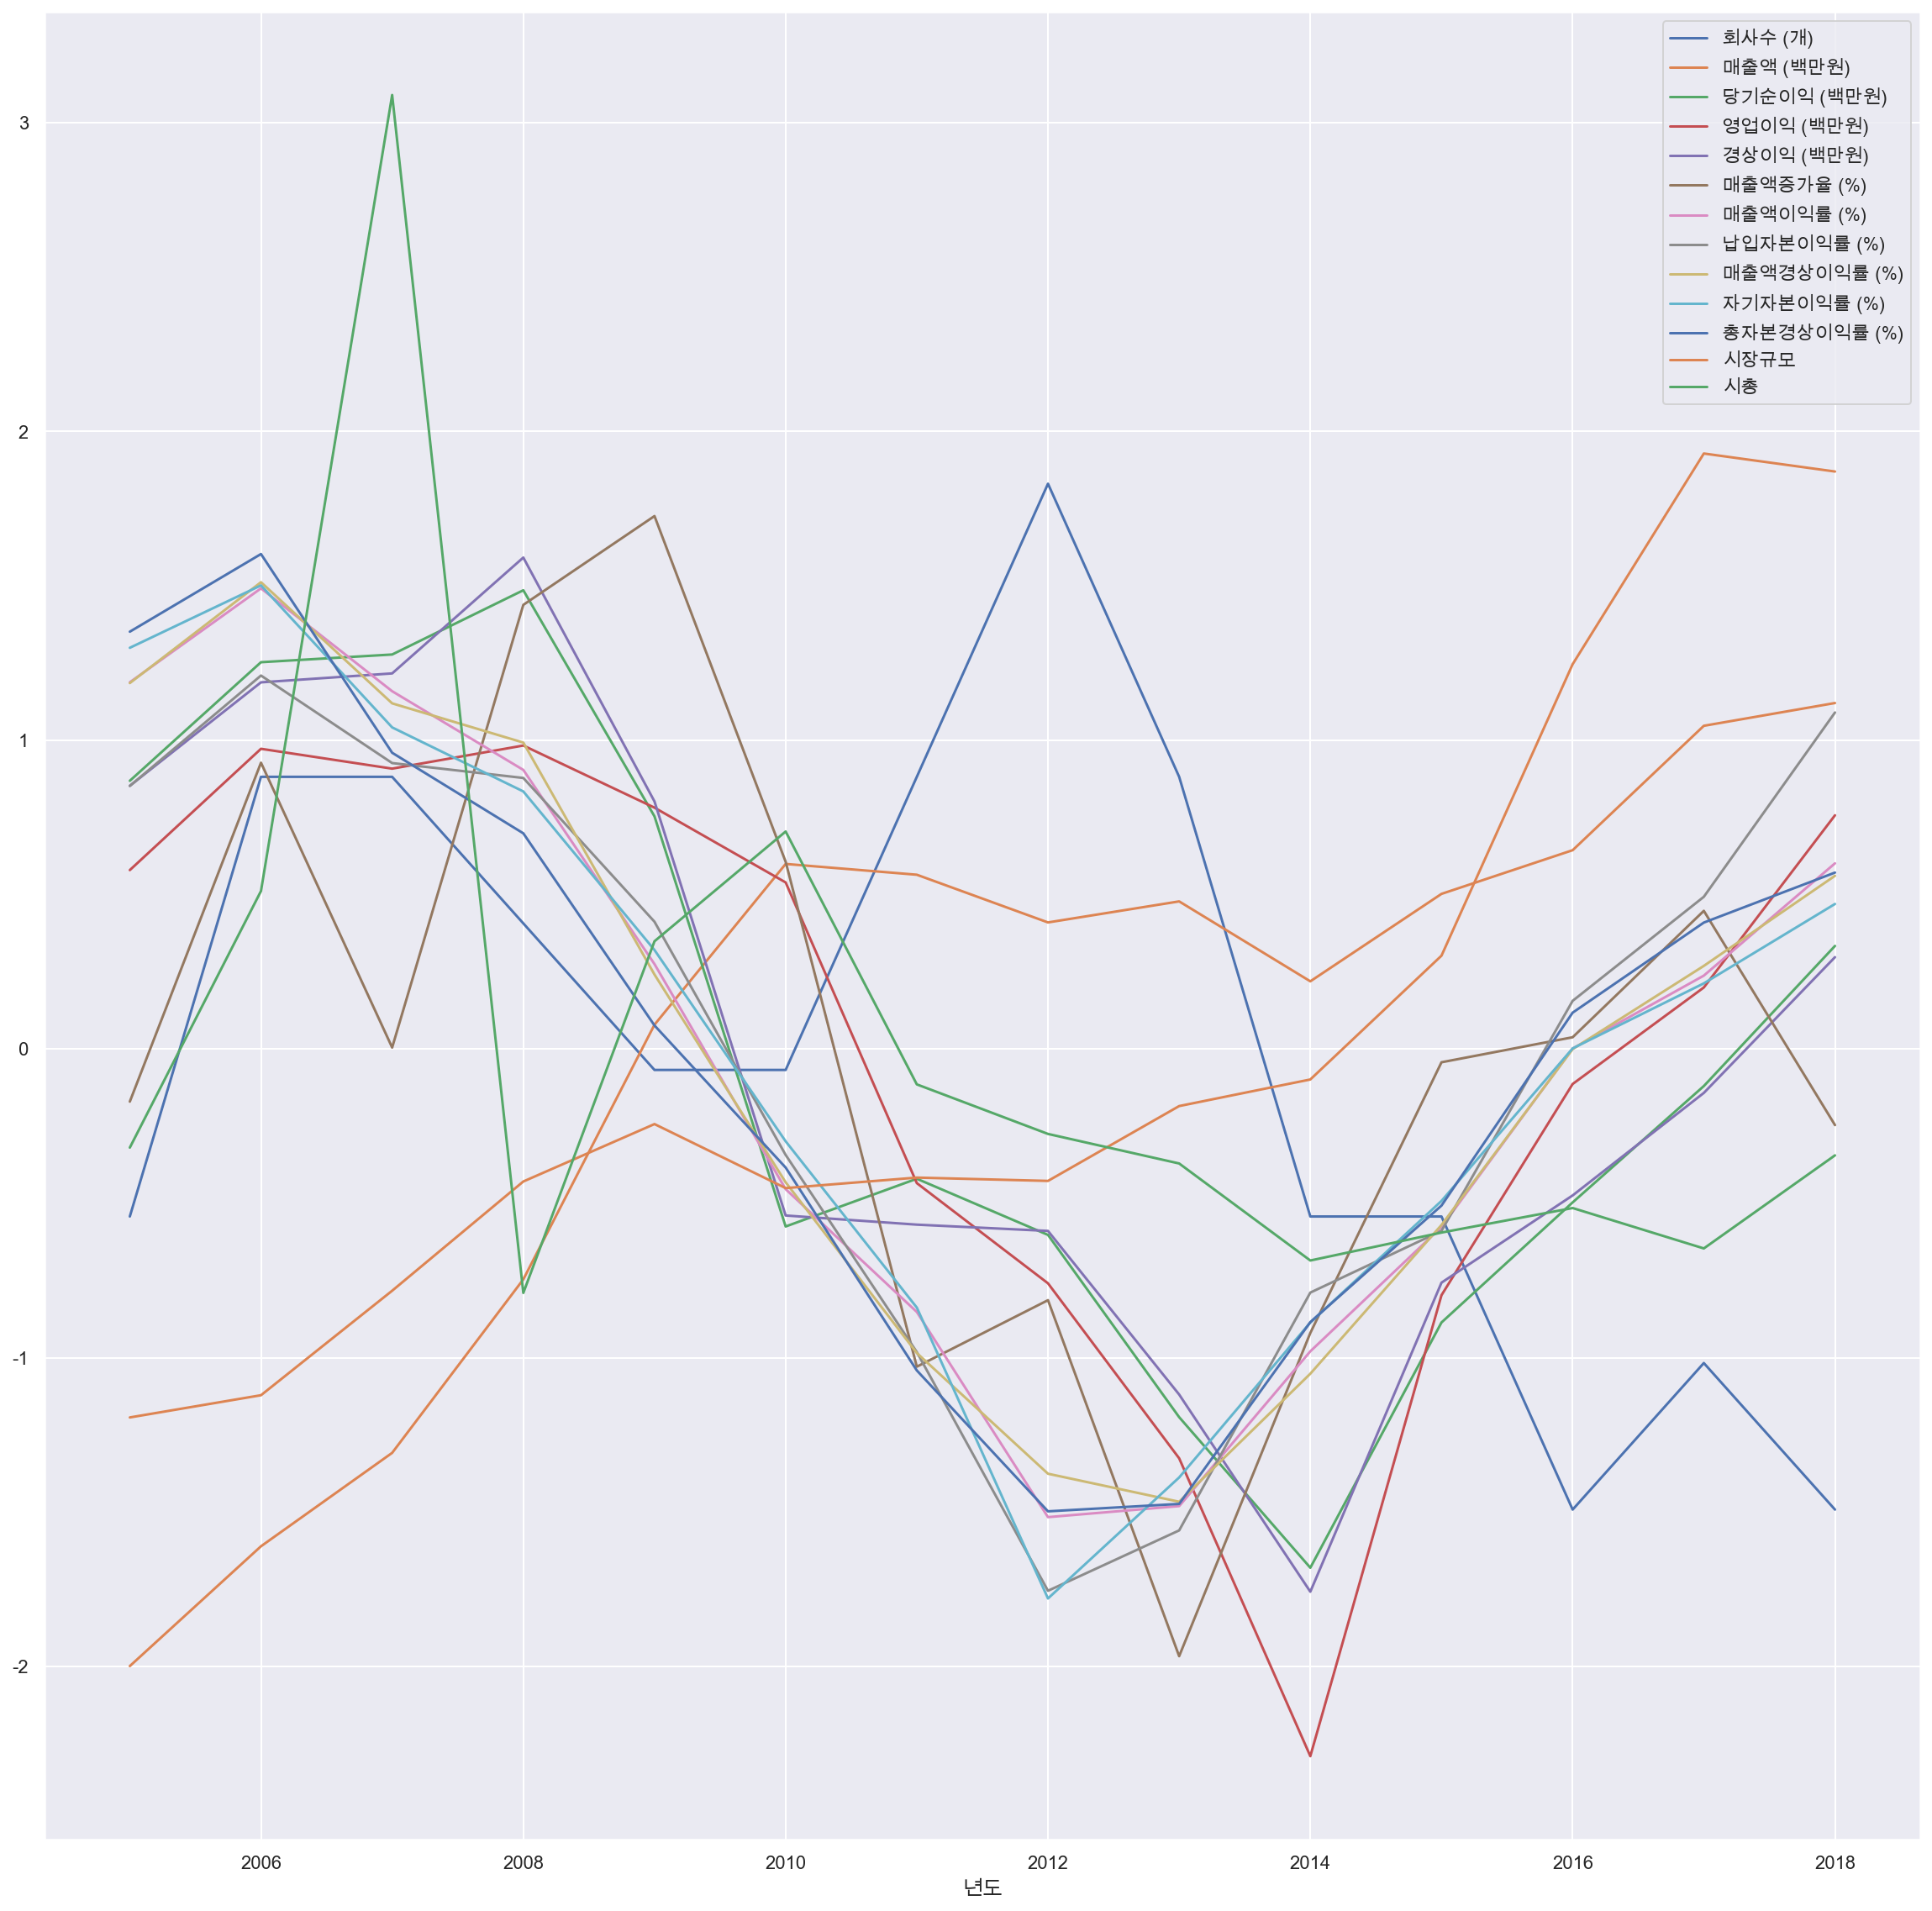

In [21]:
df_norm_ind_0.plot(x='년도', figsize=(20,20))

In [22]:
df_norm_ind_0_trans.iloc[1]

년도
2005   -0.542403
2006    0.881405
2007    0.881405
2008    0.406802
2009     -0.0678
2010     -0.0678
2011    0.881405
2012     1.83061
2013    0.881405
2014   -0.542403
2015   -0.542403
2016   -1.491608
2017   -1.017005
2018   -1.491608
Name: 회사수 (개), dtype: object

In [23]:
df_norm['산업분류'].unique().tolist()

['건설업',
 '광업',
 '기계',
 '기타제조업',
 '농업, 임업 및 어업',
 '비금속광물',
 '서비스업',
 '섬유의복',
 '운수장비',
 '운수창고업',
 '유통업',
 '음식료품',
 '의료·정밀기기',
 '의약품',
 '전기가스',
 '전기전자',
 '종이·목재',
 '철강금속',
 '통신업',
 '화학',
 '제조업']

In [24]:
df_norm_ind_13.corr()

,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
년도,1.000000,0.992803,0.985960,0.518631,0.726676,0.548093,-0.376067,-0.072372,0.152597,-0.609436,-0.569739,-0.866962,0.924870,0.853926
회사수 (개),0.992803,1.000000,0.992601,0.528082,0.730733,0.557407,-0.355088,-0.064736,0.158505,-0.615559,-0.566606,-0.857750,0.936333,0.885693
매출액 (백만원),0.985960,0.992601,1.000000,0.551271,0.773462,0.607150,-0.277781,-0.029050,0.191274,-0.570878,-0.537613,-0.828471,0.940557,0.865265
당기순이익 (백만원),0.518631,0.528082,0.551271,1.000000,0.817978,0.925764,-0.104978,0.803046,0.903879,0.278084,0.374311,-0.121938,0.483681,0.282592
영업이익 (백만원),0.726676,0.730733,0.773462,0.817978,1.000000,0.930000,0.070671,0.473346,0.651770,0.031994,0.015703,-0.332065,0.722351,0.567166
경상이익 (백만원),0.548093,0.557407,0.607150,0.925764,0.930000,1.000000,0.026869,0.707059,0.841246,0.274057,0.286248,-0.104873,0.568700,0.371481
매출액증가율 (%),-0.376067,-0.355088,-0.277781,-0.104978,0.070671,0.026869,1.000000,0.133354,0.027436,0.375521,0.294933,0.418409,-0.261381,-0.361924
매출액이익률 (%),-0.072372,-0.064736,-0.029050,0.803046,0.473346,0.707059,0.133354,1.000000,0.963755,0.778124,0.839624,0.465175,-0.087618,-0.266428
납입자본이익률 (%),0.152597,0.158505,0.191274,0.903879,0.651770,0.841246,0.027436,0.963755,1.000000,0.646590,0.714286,0.295794,0.156387,-0.031424
매출액경상이익률 (%),-0.609436,-0.615559,-0.570878,0.278084,0.031994,0.274057,0.375521,0.778124,0.646590,1.000000,0.956240,0.891842,-0.570033,-0.668942


In [25]:
df_corr_0 = abs(df_norm_ind_0.corr()) > 0.7

In [26]:
df_corr_0

,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
년도,True,False,True,False,False,False,False,False,False,False,False,False,True,False
회사수 (개),False,True,False,False,False,False,False,False,False,False,False,False,True,False
매출액 (백만원),True,False,True,False,False,False,False,False,False,False,False,False,True,False
당기순이익 (백만원),False,False,False,True,True,True,False,True,True,True,True,True,False,False
영업이익 (백만원),False,False,False,True,True,True,True,True,True,True,True,True,False,False
경상이익 (백만원),False,False,False,True,True,True,False,True,True,True,True,True,False,False
매출액증가율 (%),False,False,False,False,True,False,True,False,False,False,False,False,False,False
매출액이익률 (%),False,False,False,True,True,True,False,True,True,True,True,True,False,False
납입자본이익률 (%),False,False,False,True,True,True,False,True,True,True,True,True,False,False
매출액경상이익률 (%),False,False,False,True,True,True,False,True,True,True,True,True,False,False


In [27]:
# 건설업(0) corr > 0.7 인 관계 리스트
corr_0 = []
corr_num_0 = []
for i in range(len(df_corr_0.index)):
    for j in range(len(df_corr_0.index)):
        if df_corr_0.iloc[i,j] == True and i != j and i < j:
            corr_0.append([df_corr_0.index[i], df_corr_0.index[j]])
            corr_num_0.append([i, j])
corr_0, corr_num_0[:5]

([['년도', '매출액 (백만원)'],
  ['년도', '시장규모'],
  ['회사수 (개)', '시장규모'],
  ['매출액 (백만원)', '시장규모'],
  ['당기순이익 (백만원)', '영업이익 (백만원)'],
  ['당기순이익 (백만원)', '경상이익 (백만원)'],
  ['당기순이익 (백만원)', '매출액이익률 (%)'],
  ['당기순이익 (백만원)', '납입자본이익률 (%)'],
  ['당기순이익 (백만원)', '매출액경상이익률 (%)'],
  ['당기순이익 (백만원)', '자기자본이익률 (%)'],
  ['당기순이익 (백만원)', '총자본경상이익률 (%)'],
  ['영업이익 (백만원)', '경상이익 (백만원)'],
  ['영업이익 (백만원)', '매출액증가율 (%)'],
  ['영업이익 (백만원)', '매출액이익률 (%)'],
  ['영업이익 (백만원)', '납입자본이익률 (%)'],
  ['영업이익 (백만원)', '매출액경상이익률 (%)'],
  ['영업이익 (백만원)', '자기자본이익률 (%)'],
  ['영업이익 (백만원)', '총자본경상이익률 (%)'],
  ['경상이익 (백만원)', '매출액이익률 (%)'],
  ['경상이익 (백만원)', '납입자본이익률 (%)'],
  ['경상이익 (백만원)', '매출액경상이익률 (%)'],
  ['경상이익 (백만원)', '자기자본이익률 (%)'],
  ['경상이익 (백만원)', '총자본경상이익률 (%)'],
  ['매출액이익률 (%)', '납입자본이익률 (%)'],
  ['매출액이익률 (%)', '매출액경상이익률 (%)'],
  ['매출액이익률 (%)', '자기자본이익률 (%)'],
  ['매출액이익률 (%)', '총자본경상이익률 (%)'],
  ['납입자본이익률 (%)', '매출액경상이익률 (%)'],
  ['납입자본이익률 (%)', '자기자본이익률 (%)'],
  ['납입자본이익률 (%)', '총자본경상이익률 (%)'],
  ['매출액경상이익률 (%)', '자기자본이익률 (%)'],
  ['매

In [28]:
# df_corr_{} : {}산업별 corr > 0.7 관계 확인 DataFrame 만들기
for ind in range(len(df_norm['산업분류'].unique().tolist())):
    globals()['df_corr_{}'.format(ind)] = abs(globals()['df_norm_ind_{}'.format(ind)].corr()) > 0.7

In [29]:
for ind in range(len(df_norm['산업분류'].unique().tolist())):
    globals()['corr_{}'.format(ind)] = []
    globals()['corr_num_{}'.format(ind)] = []
    for i in range(len(globals()['df_corr_{}'.format(ind)].index)):
        for j in range(len(globals()['df_corr_{}'.format(ind)].index)):
            if globals()['df_corr_{}'.format(ind)].iloc[i,j] == True and i != j and i < j:
                globals()['corr_{}'.format(ind)].append([df_corr_0.index[i], df_corr_0.index[j]]) # corr_{} : {}산업별 0.7이상 관계 리스트
                globals()['corr_num_{}'.format(ind)].append([i, j]) # corr_num_{} : corr_{} 의 관계를 숫자화
    print(len(globals()['corr_num_{}'.format(ind)]), end=',')

33,15,25,34,34,34,23,33,27,34,25,19,30,33,21,39,34,34,21,21,30,

In [30]:
corr_7[:5]

[['년도', '회사수 (개)'],
 ['년도', '매출액 (백만원)'],
 ['년도', '시장규모'],
 ['회사수 (개)', '매출액 (백만원)'],
 ['회사수 (개)', '시장규모']]

In [31]:
# 변수간 관계 종류 및 개수(df_corr_0(건설업) 기준)
corr_kind = []
corr_kind_num = []
for i in range(len(df_corr_0.index)):
    for j in range(len(df_corr_0.index)):
        if i != j and i < j:
            corr_kind.append([df_corr_0.index[i], df_corr_0.index[j]])
            corr_kind_num.append([i,j])
len(corr_kind), len(corr_kind_num)

(91, 91)

In [77]:
# result_{} : {}산업별 corr > 0.7 인 관계 1, 그렇지 않으면 0으로 표시한 리스트

for ind in range(len(df_norm['산업분류'].unique().tolist())):
    globals()['result_{}'.format(ind)] = [0 for _ in range(len(corr_kind))]

    for x in range(len(corr_kind)):
        for y in globals()['corr_{}'.format(ind)]: # corr_{} : {}산업별 corr 유무 리스트
            if corr_kind[x] == y:
                globals()['result_{}'.format(ind)][x] = 1

In [78]:
len(result_0), len(corr_kind), len(corr_0)

(91, 91, 33)

In [83]:
result_0[:20]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [97]:
# 산업별 0.7이상 관계 하나의 데이터프레임(corr_final)으로 작성하기
corr_final = pd.DataFrame(
    index=df_norm['산업분류'].unique().tolist(),
    columns = [str(corr_kind[i]) for i in range(len(corr_kind))],
    data=[globals()['result_{}'.format(ind)] for ind in range(len(df_norm['산업분류'].unique().tolist()))])

In [98]:
corr_final.head()

,"['년도', '회사수 (개)']","['년도', '매출액 (백만원)']","['년도', '당기순이익 (백만원)']","['년도', '영업이익 (백만원)']","['년도', '경상이익 (백만원)']","['년도', '매출액증가율 (%)']","['년도', '매출액이익률 (%)']","['년도', '납입자본이익률 (%)']","['년도', '매출액경상이익률 (%)']","['년도', '자기자본이익률 (%)']",...,"['매출액경상이익률 (%)', '자기자본이익률 (%)']","['매출액경상이익률 (%)', '총자본경상이익률 (%)']","['매출액경상이익률 (%)', '시장규모']","['매출액경상이익률 (%)', '시총']","['자기자본이익률 (%)', '총자본경상이익률 (%)']","['자기자본이익률 (%)', '시장규모']","['자기자본이익률 (%)', '시총']","['총자본경상이익률 (%)', '시장규모']","['총자본경상이익률 (%)', '시총']","['시장규모', '시총']"
건설업,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
광업,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
기계,1,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
기타제조업,0,1,1,1,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
"농업, 임업 및 어업",0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1


In [100]:
corr_final.tail()

,"['년도', '회사수 (개)']","['년도', '매출액 (백만원)']","['년도', '당기순이익 (백만원)']","['년도', '영업이익 (백만원)']","['년도', '경상이익 (백만원)']","['년도', '매출액증가율 (%)']","['년도', '매출액이익률 (%)']","['년도', '납입자본이익률 (%)']","['년도', '매출액경상이익률 (%)']","['년도', '자기자본이익률 (%)']",...,"['매출액경상이익률 (%)', '자기자본이익률 (%)']","['매출액경상이익률 (%)', '총자본경상이익률 (%)']","['매출액경상이익률 (%)', '시장규모']","['매출액경상이익률 (%)', '시총']","['자기자본이익률 (%)', '총자본경상이익률 (%)']","['자기자본이익률 (%)', '시장규모']","['자기자본이익률 (%)', '시총']","['총자본경상이익률 (%)', '시장규모']","['총자본경상이익률 (%)', '시총']","['시장규모', '시총']"
종이·목재,1,1,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
철강금속,1,0,0,0,1,0,1,1,1,1,...,1,1,0,0,1,0,0,0,0,0
통신업,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
화학,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
제조업,1,1,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1


In [115]:
# 맞는지 검토
for ind in range(len(df_norm['산업분류'].unique().tolist())):
    if corr_final.iloc[ind].tolist() == globals()['result_{}'.format(ind)]:
        print('ok', end=',')
    else:
        print('error!!!!!!!!!!!!', end='\n')
    

ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,

In [116]:
# 제일 하단 total 만들기
corr_final.loc['Total'] = corr_final.sum(axis=0)

In [117]:
corr_final.tail()

,"['년도', '회사수 (개)']","['년도', '매출액 (백만원)']","['년도', '당기순이익 (백만원)']","['년도', '영업이익 (백만원)']","['년도', '경상이익 (백만원)']","['년도', '매출액증가율 (%)']","['년도', '매출액이익률 (%)']","['년도', '납입자본이익률 (%)']","['년도', '매출액경상이익률 (%)']","['년도', '자기자본이익률 (%)']",...,"['매출액경상이익률 (%)', '자기자본이익률 (%)']","['매출액경상이익률 (%)', '총자본경상이익률 (%)']","['매출액경상이익률 (%)', '시장규모']","['매출액경상이익률 (%)', '시총']","['자기자본이익률 (%)', '총자본경상이익률 (%)']","['자기자본이익률 (%)', '시장규모']","['자기자본이익률 (%)', '시총']","['총자본경상이익률 (%)', '시장규모']","['총자본경상이익률 (%)', '시총']","['시장규모', '시총']"
철강금속,1,0,0,0,1,0,1,1,1,1,...,1,1,0,0,1,0,0,0,0,0
통신업,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
화학,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
제조업,1,1,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
Total,11,16,2,6,2,0,3,5,2,3,...,19,20,2,1,21,1,0,2,2,8


In [123]:
corr_final.columns.tolist()[:3]

["['년도', '회사수 (개)']", "['년도', '매출액 (백만원)']", "['년도', '당기순이익 (백만원)']"]

In [124]:
corr_final.loc['Total'].tolist()[:10]

[11, 16, 2, 6, 2, 0, 3, 5, 2, 3]

In [149]:
# csv로 저장
corr_final.to_csv('./datas/corr_final.csv', index=False)

In [135]:
# Total 순서로 sort

corr_final_trans = corr_final.transpose().sort_values(by='Total', ascending=False)
corr_final_trans.head(30)

,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,...,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학,제조업,Total
"['매출액이익률 (%)', '매출액경상이익률 (%)']",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,21
"['자기자본이익률 (%)', '총자본경상이익률 (%)']",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,21
"['매출액이익률 (%)', '납입자본이익률 (%)']",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,21
"['당기순이익 (백만원)', '경상이익 (백만원)']",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,21
"['매출액경상이익률 (%)', '총자본경상이익률 (%)']",1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,20
"['매출액이익률 (%)', '자기자본이익률 (%)']",1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,20
"['매출액경상이익률 (%)', '자기자본이익률 (%)']",1,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,19
"['매출액이익률 (%)', '총자본경상이익률 (%)']",1,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,1,19
"['납입자본이익률 (%)', '자기자본이익률 (%)']",1,1,1,1,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,18
"['영업이익 (백만원)', '경상이익 (백만원)']",1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,18


In [138]:
corr_final_trans.index.tolist()[:30]

["['매출액이익률 (%)', '매출액경상이익률 (%)']",
 "['자기자본이익률 (%)', '총자본경상이익률 (%)']",
 "['매출액이익률 (%)', '납입자본이익률 (%)']",
 "['당기순이익 (백만원)', '경상이익 (백만원)']",
 "['매출액경상이익률 (%)', '총자본경상이익률 (%)']",
 "['매출액이익률 (%)', '자기자본이익률 (%)']",
 "['매출액경상이익률 (%)', '자기자본이익률 (%)']",
 "['매출액이익률 (%)', '총자본경상이익률 (%)']",
 "['납입자본이익률 (%)', '자기자본이익률 (%)']",
 "['영업이익 (백만원)', '경상이익 (백만원)']",
 "['경상이익 (백만원)', '납입자본이익률 (%)']",
 "['납입자본이익률 (%)', '총자본경상이익률 (%)']",
 "['납입자본이익률 (%)', '매출액경상이익률 (%)']",
 "['년도', '시장규모']",
 "['당기순이익 (백만원)', '납입자본이익률 (%)']",
 "['당기순이익 (백만원)', '영업이익 (백만원)']",
 "['년도', '매출액 (백만원)']",
 "['매출액 (백만원)', '시장규모']",
 "['경상이익 (백만원)', '매출액경상이익률 (%)']",
 "['년도', '회사수 (개)']",
 "['년도', '시총']",
 "['영업이익 (백만원)', '납입자본이익률 (%)']",
 "['경상이익 (백만원)', '매출액이익률 (%)']",
 "['경상이익 (백만원)', '총자본경상이익률 (%)']",
 "['당기순이익 (백만원)', '매출액이익률 (%)']",
 "['매출액 (백만원)', '시총']",
 "['당기순이익 (백만원)', '매출액경상이익률 (%)']",
 "['당기순이익 (백만원)', '자기자본이익률 (%)']",
 "['당기순이익 (백만원)', '총자본경상이익률 (%)']",
 "['경상이익 (백만원)', '자기자본이익률 (%)']"]

In [143]:
# 순위가 높은 항목(상위 30개) 중 '이익-이익' 관계 삭제
corr_final_trans = corr_final_trans.drop(index=["['매출액이익률 (%)', '매출액경상이익률 (%)']",
 "['자기자본이익률 (%)', '총자본경상이익률 (%)']",
 "['매출액이익률 (%)', '납입자본이익률 (%)']",
 "['당기순이익 (백만원)', '경상이익 (백만원)']",
 "['매출액경상이익률 (%)', '총자본경상이익률 (%)']",
 "['매출액이익률 (%)', '자기자본이익률 (%)']",
 "['매출액경상이익률 (%)', '자기자본이익률 (%)']",
 "['매출액이익률 (%)', '총자본경상이익률 (%)']",
 "['납입자본이익률 (%)', '자기자본이익률 (%)']",
 "['영업이익 (백만원)', '경상이익 (백만원)']",
 "['경상이익 (백만원)', '납입자본이익률 (%)']",
 "['납입자본이익률 (%)', '총자본경상이익률 (%)']",
 "['납입자본이익률 (%)', '매출액경상이익률 (%)']",
 
 "['당기순이익 (백만원)', '납입자본이익률 (%)']",
 "['당기순이익 (백만원)', '영업이익 (백만원)']",


 "['경상이익 (백만원)', '매출액경상이익률 (%)']",


 "['영업이익 (백만원)', '납입자본이익률 (%)']",
 "['경상이익 (백만원)', '매출액이익률 (%)']",
 "['경상이익 (백만원)', '총자본경상이익률 (%)']",
 "['당기순이익 (백만원)', '매출액이익률 (%)']",

 "['당기순이익 (백만원)', '매출액경상이익률 (%)']",
 "['당기순이익 (백만원)', '자기자본이익률 (%)']",
 "['당기순이익 (백만원)', '총자본경상이익률 (%)']",
 "['경상이익 (백만원)', '자기자본이익률 (%)']"]
)

In [147]:
# Total 상위 10개 = total 8 이상
corr_final_trans.head(10)

,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,...,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학,제조업,Total
"['년도', '시장규모']",1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,1,17
"['년도', '매출액 (백만원)']",1,0,1,1,1,1,0,1,1,1,...,0,1,1,1,1,0,1,0,1,16
"['매출액 (백만원)', '시장규모']",1,0,1,1,1,1,0,1,1,1,...,0,1,1,1,1,1,0,0,1,16
"['년도', '회사수 (개)']",0,0,1,0,0,0,1,1,1,0,...,1,1,0,0,1,1,0,1,1,11
"['년도', '시총']",0,0,0,1,1,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,10
"['매출액 (백만원)', '시총']",0,0,0,1,1,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,9
"['시장규모', '시총']",0,0,0,1,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,8
"['회사수 (개)', '매출액 (백만원)']",0,0,1,0,0,0,0,1,1,1,...,0,1,0,0,0,1,0,0,1,8
"['매출액 (백만원)', '영업이익 (백만원)']",0,0,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,8
"['회사수 (개)', '시장규모']",1,0,1,0,0,0,1,1,1,0,...,1,1,0,0,1,0,0,0,0,8


In [150]:
# csv로 저장
corr_final_trans.to_csv('./datas/corr_final_trans.csv', index=False)

In [ ]:
가나다라

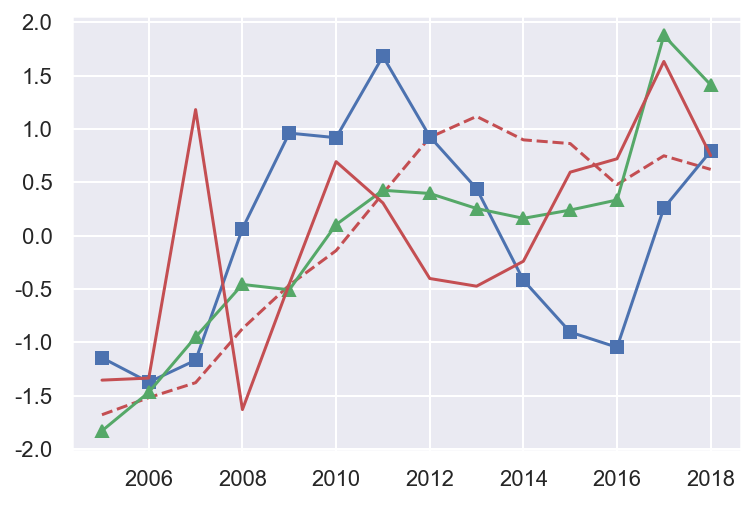

In [41]:
plt.plot(df_norm_ind_2['년도'], df_norm_ind_2['매출액 (백만원)'], 'r--', 
        df_norm_ind_2['년도'], df_norm_ind_2['영업이익 (백만원)'], 'bs-', 
        df_norm_ind_2['년도'], df_norm_ind_2['시장규모'], 'g^-',
        df_norm_ind_2['년도'], df_norm_ind_2['시총'], 'r' )

In [42]:
df_norm['산업분류'].unique().tolist()[2]

'기계'

In [ ]:
sns.pairplot(df, hue="산업분류")

In [ ]:
sns.pairplot(df, hue="산업분류", height=1)

In [ ]:
sns.pairplot(df_norm, hue="산업분류", height=1)

In [ ]:
sns.pairplot(df_norm, hue="산업분류", height=2)